# Mary Donovan Martello

## This file contains code from Deep Learning with Python, www.manning.com/books/deep-learning-with-python, Copyright 2018 Francois Chollet.

# Binary Classification of Text Data

## 5.1 Implements a Movie Review Classifier.

**Load the data set.**

In [1]:
#load the data set
from keras.datasets import imdb
# split into training and test data and keep only the 10,000 most frequent words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\trave\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\trave\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you mus

In [2]:
type(train_data)

numpy.ndarray

In [2]:
#train_data are lists of reviews; each review is a list of word indices (encoding a sequence of words)
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
#train_labels is a list of 0 for negative review and 1 for a positive review
train_labels[0]

1

In [3]:
type(train_labels)

numpy.ndarray

In [6]:
# decode one of these reviews back to English words:

# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# decode the review; indices offset by 3 because 0, 1 and 2 are reserved indices for "padding", 
# "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Prepare the data.

**Use one-hot encoding to turn data into vectors of 0s and 1s.**

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# vectorized training data
x_train = vectorize_sequences(train_data)
# vectorized test data
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
# vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
y_train[0]

1.0

## Build the neural network.

In [12]:
# the Keras implementation of the three-layer network

from keras import models
from keras import layers

# define the model
model = models.Sequential()
# 16 hidden layers; input shape is the size of data vector
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
# sigmoid for binary classification problem
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
# compile the model

# binary_crossentropy loss function for binary classification problem 
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Validate the model

In [16]:
# create validation set from the training data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Fit the model and collect measurement logs**

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 43ms/step - loss: 0.5288 - binary_accuracy: 0.7833 - val_loss: 0.4031 - val_binary_accuracy: 0.8715
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3186 - binary_accuracy: 0.9005 - val_loss: 0.3148 - val_binary_accuracy: 0.8837
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2330 - binary_accuracy: 0.9235 - val_loss: 0.2941 - val_binary_accuracy: 0.8839
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1790 - binary_accuracy: 0.9405 - val_loss: 0.2899 - val_binary_accuracy: 0.8844
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1472 - binary_accuracy: 0.9533 - val_loss: 0.2805 - val_binary_accuracy: 0.8908
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1200 - binary_accuracy: 0.9633 - val_loss: 0.2904 - val_binary_accuracy: 0.8899
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - los

**Plot the training and validation accuracy**

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

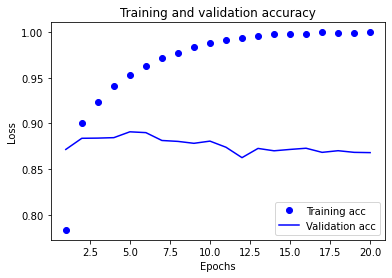

In [23]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Re-Train the Model based on Plots**

In [24]:
# change epochs to 4
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 9ms/step - loss: 0.4385 - accuracy: 0.8212
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2507 - accuracy: 0.9111
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1952 - accuracy: 0.9299
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2966 - accuracy: 0.8830


In [25]:
results

[0.29663580656051636, 0.8830400109291077]

## Make Predictions from Model

Predictions

Using a trained network to generate predictions on new data

After having trained a network, you will want to use it in a practical setting. You can generate the likelihood of reviews being positive by using the predict method.  The network is very confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4).

In [26]:
model.predict(x_test)

array([[0.20234057],
       [0.9999266 ],
       [0.83309853],
       ...,
       [0.08844787],
       [0.0547986 ],
       [0.5567707 ]], dtype=float32)

# Assignment 5.2

## Assignment 5.2:  Multi-class classification.

### 5.2:  Implement the news classifier.


**Load the data.**

In [27]:
from keras.datasets import reuters

# the argument num_words=10000 restricts the data to the 10,000 most frequently occurring words found in the data.

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


2113536/2110848 [==============================] - 0s 0us/step


In [28]:
# 8,982 training examples and 2,246 test examples:
print(len(train_data))
print(len(test_data))

8982
2246


In [29]:
# each example is a list of integers (word indices):

train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [30]:
# decode an example back to words:

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# indices were offset by 3 because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [31]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [32]:
#The label associated with an example is an integer between 0 and 45: a topic index.
train_labels[10]

3

### Prepare the data.

**Vectorize the data by casting the label list as an integor tensor.**

In [33]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

**One-hot encode the labels into vectors of 0s and 1s.**

In [34]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

#Note that there is a built-in way to do this in Keras, which you have already seen in action in our MNIST example:

# from keras.utils.np_utils import to_categorical

# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

### Build the Model.

In [35]:
# define the model
from keras import models
from keras import layers

model = models.Sequential()
# 64 hidden layers (greater than number of classes); input shape is the size of the data vector
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
# use softmax for multi-classificaiton problem
model.add(layers.Dense(46, activation='softmax'))

In [36]:
# compile the model

# categorical_crossentropy for mulit-classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Validate the Model.

Validation

Let's set apart 1,000 samples in our training data to use as a validation set:

In [37]:
# create validation set from the training data

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [38]:
# train the model and collect measurement logs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 25ms/step - loss: 2.7015 - accuracy: 0.5209 - val_loss: 1.8037 - val_accuracy: 0.6200
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4638 - accuracy: 0.6972 - val_loss: 1.3706 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0752 - accuracy: 0.7685 - val_loss: 1.1624 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8451 - accuracy: 0.8171 - val_loss: 1.0495 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6672 - accuracy: 0.8638 - val_loss: 0.9854 - val_accuracy: 0.8110
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5347 - accuracy: 0.8875 - val_loss: 0.9352 - val_accuracy: 0.8180
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4318 - accuracy: 0.9100 - val_loss: 0.9110 - val_accuracy: 0.8170
Epoch 8/20
16

Display its loss and accuracy curves

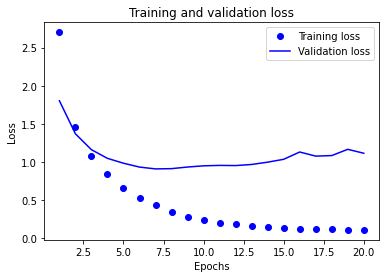

In [39]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

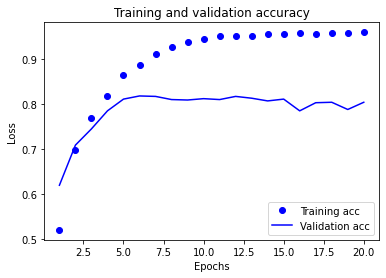

In [40]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Retrain the model based on plots by changing epochs to 8 as network overfitted after 8 epochs.**

In [41]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 0s 26ms/step - loss: 2.6747 - accuracy: 0.4749 - val_loss: 1.7479 - val_accuracy: 0.6300
Epoch 2/8
16/16 [==============================] - 0s 18ms/step - loss: 1.4379 - accuracy: 0.6992 - val_loss: 1.3154 - val_accuracy: 0.7080
Epoch 3/8
16/16 [==============================] - 0s 18ms/step - loss: 1.0797 - accuracy: 0.7729 - val_loss: 1.1449 - val_accuracy: 0.7500
Epoch 4/8
16/16 [==============================] - 0s 19ms/step - loss: 0.8525 - accuracy: 0.8207 - val_loss: 1.0452 - val_accuracy: 0.7730
Epoch 5/8
16/16 [==============================] - 0s 18ms/step - loss: 0.6857 - accuracy: 0.8547 - val_loss: 0.9725 - val_accuracy: 0.7970
Epoch 6/8
16/16 [==============================] - 0s 18ms/step - loss: 0.5445 - accuracy: 0.8872 - val_loss: 0.9258 - val_accuracy: 0.8070
Epoch 7/8
16/16 [==============================] - 0s 17ms/step - loss: 0.4380 - accuracy: 0.9087 - val_loss: 0.9352 - val_accuracy: 0.8090
Epoch 8/8
71/71 [===

In [42]:
results

[1.000209093093872, 0.7809438705444336]

### Make Predictions from the Model.

In [44]:
predictions = model.predict(x_test)

Each entry in predictions is a vector of length 46:

In [45]:
predictions[0].shape

(46,)

The coefficients in this vector sum to 1:

In [46]:
np.sum(predictions[0])

0.9999999

The largest entry is the predicted class, i.e. the class with the highest probability:

In [47]:
np.argmax(predictions[0])

3

# Assignment 5.3:  Keras Regression

## Implement a housing price regression model.

**Load Data**

In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## Prepare the Data

In [5]:
# normalize the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## Build the Model

In [6]:
# use a function to define and compile the model
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    # use a very small network with two hidden layers each with 64 units
    # input shape is the size of the data vector
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    # mse because a regression problem and mae as a metric for the difference between the predictions and target
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

## Validate the Model

In [7]:
# use k-fold cross validation because of the small dataset

import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [8]:
all_scores

[2.1692018508911133, 3.0849814414978027, 2.6136116981506348, 2.503598928451538]

In [9]:
np.mean(all_scores)

2.592848479747772

**Compute the average of the per-epoch MAE scores for all folds:**

In [15]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plot the average MAE**

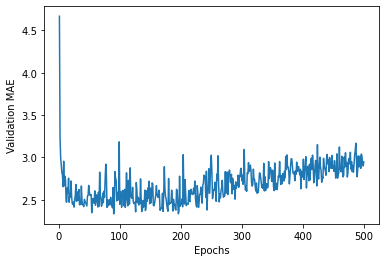

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

**Make the plot easier to read by omitting the first 10 data points**

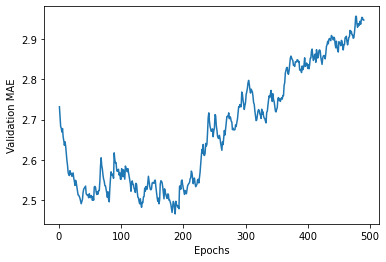

In [17]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

**Retrain the model based on the plots; overfitted after 80 epochs.**

In [18]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 20.1482 - mae: 2.8019


In [19]:
# evaluate the new model
test_mae_score

2.8019495010375977